In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.03f' % x)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
file_route = "/content/drive/My Drive"
df = pd.read_csv(f'{file_route}/data_preprocessed_binary.csv')

In [ ]:
X = df.loc[:, df.columns != '식전혈당']
y = df['식전혈당']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [ ]:
model = AdaBoostClassifier()

In [ ]:
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
def get_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  roc = roc_auc_score(y_true, y_pred)
  print("accuracy : %f" %acc)
  print("recall   : %f" %recall)
  print("precision: %f" %prec)
  print("f1       : %f" %f1)
  print("AUC      : %f" %roc)

  return [acc, recall, prec, f1, roc]

In [ ]:
y_pred = model.predict(X_test)

metrics1 = get_metrics(y_test, y_pred)
print()
print(confusion_matrix(y_test, y_pred))

accuracy : 0.710513
recall   : 0.747483
precision: 0.695595
f1       : 0.720606
AUC      : 0.710555

[[205775  99698]
 [ 76963 227820]]


In [3]:
feat_impt = ['성별코드', '연령대코드', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', 'AST', 'ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       '비만여부', '고혈압']
feat_list = [0, 0.2, 0.08, 0.02, 0.06, 0.04, 0.06, 0.02, 0.02, 0.02, 0.1, 0.12, 0.14, 0.06,
 0, 0.02, 0.02, 0.02]

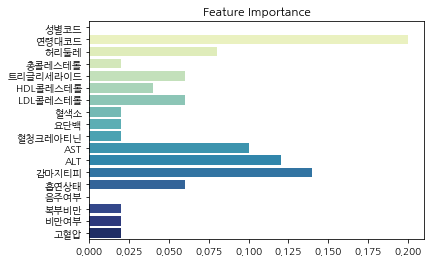

In [4]:
ax = sns.barplot(y=feat_impt, x=feat_list, palette="YlGnBu")
plt.title('Feature Importance')
plt.show(ax)

In [ ]:
print(X_train.columns)
print(model.feature_importances_)

feat_impt = model.feature_importances_
feat_list = []

for i in range(len(feat_impt)):
  if feat_impt[i] >= 0.04:
    feat_list.append(X_train.columns[i])

print(feat_list)

Index(['성별코드', '연령대코드', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', 'AST', 'ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       '비만여부', '고혈압'],
      dtype='object')
[0.   0.2  0.08 0.02 0.06 0.04 0.06 0.02 0.02 0.02 0.1  0.12 0.14 0.06
 0.   0.02 0.02 0.02]
['연령대코드', '허리둘레', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', 'AST', 'ALT', '감마지티피', '흡연상태']


In [ ]:
X = X[feat_list]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [ ]:
X_train.shape

(1239002, 9)

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.001, 0.01, 0.1, 1.0]

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, cv = 3, param_grid=grid, n_jobs=-1, verbose = 2, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 92.4min finished


Best: 0.708945 using {'learning_rate': 1.0, 'n_estimators': 500}


In [ ]:
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.625434 (0.000211) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.625434 (0.000211) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.625434 (0.000211) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.640848 (0.000813) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.625434 (0.000211) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.640848 (0.000813) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.664252 (0.000641) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.687119 (0.000707) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.663838 (0.000373) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.687070 (0.000474) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.695702 (0.000586) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.707553 (0.000389) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.681040 (0.000588) with: {'learning_rate': 1.0, 'n_estimators': 10}
0.703801 (0.000691) with: {'learning_rate': 1.0, 'n_estimators': 50}
0.707095 (0.0004

In [ ]:
y_pred_grid = grid_result.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_grid)

metrics1 = get_metrics(y_test, y_pred_grid)
print()
print(cf_matrix)

accuracy : 0.710599
recall   : 0.752131
precision: 0.694880
f1       : 0.722373
AUC      : 0.710550

[[203883 100889]
 [ 75720 229764]]


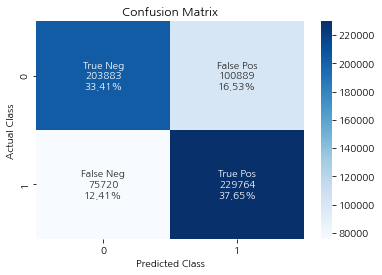

In [13]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show(ax)